In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from src.algorithms import DART
from src.projections import *
from src.phantom_creator import *
from scipy.sparse import csr_matrix

# Instanciate DART
dart = DART()

<h4>Choose phantom</h4>

gray values: [  0. 255.]


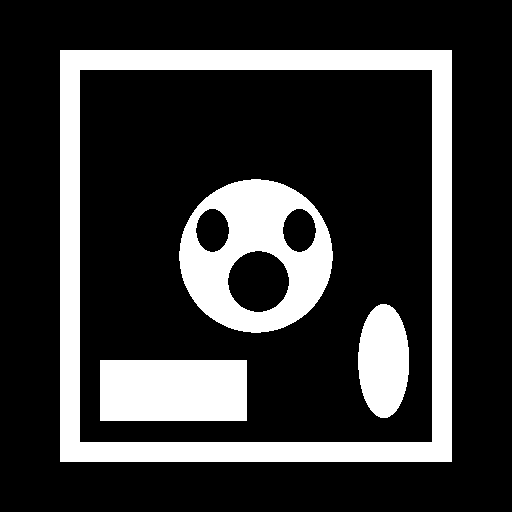

In [2]:
img = np.array(Image.open("phantoms/paws/paw_0.png"), dtype=np.uint8)
img_width, img_height = img.shape

gray_lvls = np.unique(img).astype(np.float16)
print("gray values:",gray_lvls)
Image.fromarray(img)

<h4>Define measurements</h4>

In [6]:
n_projections = 4
n_detectors = 512
det_spacing = 1
ang_mul = 1
noise_factor = None

# prepare all the data
img = np.array(Image.fromarray(img), dtype=np.uint8)
img_width, img_height = img.shape

gray_lvls = np.unique(img).astype(np.float16)
vol_geom = astra.creators.create_vol_geom([img_width,img_height])
phantom_id = astra.data2d.create('-vol', vol_geom, data=img)
projector_id, sino_id, sinogram = project_from_2D(phantom_id,
                                                vol_geom,
                                                n_projections,
                                                n_detectors,
                                                ang_mul,det_spacing,
                                                noise_factor,
                                                use_gpu=True)

<h4>Run algorithms</h4>

DART mean error 26.174842834472656


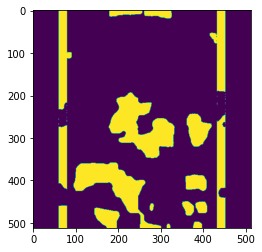

In [8]:
# run the algorithm
dart = DART()
dart_res = dart(iters=200,
            gray_levels=gray_lvls,p=0.85,
            vol_shape=img.shape,
            projector_id=projector_id, sino_id=sino_id,
            rec_alg="SART_CUDA", rec_iter=200)

print("DART mean error",np.abs(img - dart_res).mean())
Image.fromarray(dart_res.astype(np.uint8))
plt.imshow(dart_res)

SART mean error 56.9654


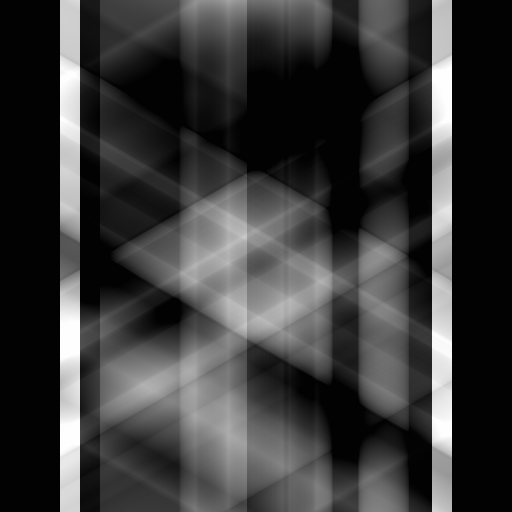

In [7]:
sart_res_id, sart_res = DART().SART(vol_geom, 0, projector_id, sino_id, 
                                    20000, use_gpu=True)
                                    
#sart_res = dart.segment(sart_res,np.unique(img).astype(np.float16))
print("SART mean error",np.abs(img - sart_res).mean())

Image.fromarray(sart_res.astype(np.uint8))